In [2]:
from nba_api.stats.endpoints import leaguedashteamstats
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Historical Trends in the Number of 3-pointers made in the NBA and its influence on the current game
##### The 3 pointer revolutionzed the game of basketball, plain and simple. If you tune in and watch an NBA game today, you will see around 42.5 three pointers attempted per game, compared to just 16 per game in the 1996-97 season. The question begging to be asked is: what could lead to such a significant increase in the number of three pointers attempted (and made) per game? 
It all leads back to one name, Mr. Stephen Curry. 
Curry's arrival marked a paradigm shift in how the game was played: 

he didn't just take threes; he took deep, off-the-dribble, and high-volume threes with unprecedented accuracy. This shattered the conventional wisdom about shot selection.
His impact influenced not just his team, but league-wide strategy:
Other teams began to emulate the Warriors' success.
Analytics-driven decision-making promoted the three-pointer as the most valuable shot due to its efficiency compared to mid-range jumpers.

##### My hypothesis is that this drastic increase in the number of 3-pointers attempted per game will begin to become noticable after the 2009 NBA draft (excluding the limited 1998-99, 2011-12, and 2019-20 seasons due to NBA Lockouts & COVID); exactly when Stephen Curry was drafted to the Golden State Warriors.


### (2) Data Collected:

Data was collected using nba_api, which is an API Client for www.nba.com. This package makes the APIs of NBA.com easily accessible and provides extensive documentation about them. Web-scraping was used to extract data on NBA champions from https://en.wikipedia.org/wiki/List_of_NBA_champions

This combination of data collection methods reflects what we learned in DSCI 510, and provided the right amount of data necessary to conduct my analyses. The data extracted with the nba_api contained 832 rows and ended up being extrapolated into 8 columns. The data from wikipedia contained 78 rows and 2 columns worth of data. My original plan was to use two apis to grab my data as I felt that would be easier, however, it turned out that webscraping the list of cumulative NBA champions from wikipedia was easier and also was better to illustrate concepts from DSCI 510!

### (3) Analysis Techniques:

I broke the analysis section into two parts:
- Summary statistics and visualizations will be provided before our main analysis is performed
    - Correlational Analysis
    - Descriptive Statistics
- Main Analysis:
    - Line plot of total 3-pointers made by season with an indication of when Stephen Curry was drafted, and then observing the before and after
    - Summary table on the difference in mean number of 3-pointers attempted by season, looking specifically at before and after Stephen Curry was drafted

**DISCLAIMER**: This report is meant to be used only as an exploratory data analysis exercise and does not have causal implications attached to the data.


### Import data from nba_api

In [9]:
# Function to get 3-point stats for a specific season
def get_three_stats(szn):
    team_stats = leaguedashteamstats.LeagueDashTeamStats(season = szn)
    df = team_stats.get_data_frames()[0]
    return df[['TEAM_NAME', 'FG3M', 'FG3A', 'FG3_PCT', 'W_RANK']]



# Generate the list of NBA seasons since the 1996-1997 season (historical data for this API only goes this far back)
szns = [f"{year}-{str(year + 1)[-2:]}" for year in range(1995, 2024)]
all_stats = pd.DataFrame()

# Loop over all seasons and combine into one dataframe
for i in szns:
    stats = get_three_stats(i)
    stats['SEASON'] = i
    all_stats = pd.concat([all_stats, stats])


/var/folders/9c/rjnrtdkd64x4y964_06pt9dc0000gr/T/ipykernel_10630/777013971.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stats = pd.concat([all_stats, stats])


In [11]:
all_stats 

,TEAM_NAME,FG3M,FG3A,FG3_PCT,W_RANK,SEASON
0,Atlanta Hawks,659,1833,0.360,7,1996-97
1,Boston Celtics,467,1331,0.351,28,1996-97
2,Charlotte Hornets,591,1382,0.428,9,1996-97
3,Chicago Bulls,523,1403,0.373,1,1996-97
4,Cleveland Cavaliers,483,1284,0.376,14,1996-97
...,...,...,...,...,...,...
25,Sacramento Kings,1178,3219,0.366,16,2023-24
26,San Antonio Spurs,1036,2983,0.347,26,2023-24
27,Toronto Raptors,942,2712,0.347,25,2023-24
28,Utah Jazz,1060,2993,0.354,23,2023-24


In [4]:
all_stats.tail(10)



,TEAM_NAME,FG3M,FG3A,FG3_PCT,W_RANK,SEASON
20,Oklahoma City Thunder,1090,2805,0.389,2,2023-24
21,Orlando Magic,903,2568,0.352,12,2023-24
22,Philadelphia 76ers,992,2733,0.363,12,2023-24
23,Phoenix Suns,1020,2671,0.382,8,2023-24
24,Portland Trail Blazers,939,2723,0.345,27,2023-24
25,Sacramento Kings,1178,3219,0.366,16,2023-24
26,San Antonio Spurs,1036,2983,0.347,26,2023-24
27,Toronto Raptors,942,2712,0.347,25,2023-24
28,Utah Jazz,1060,2993,0.354,23,2023-24
29,Washington Wizards,1015,2915,0.348,29,2023-24


In [1]:
2+2

4

### Web Scrape List of NBA Champions using BeautifulSoup and requests

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_NBA_champions'
response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with class 'wikitable'
tables = soup.find_all('table', {'class': 'wikitable'})
champions_table = tables[1]

champions = []
for i in champions_table.find_all('tr')[1:]: #Skip header
    cells = i.find_all('td')
    if len(cells) >= 4:
        try:
            year = cells[0].get_text(strip = True)
            champion = cells[1].get_text(strip = True)
            champions.append({
                'year': year,
                'TEAM_NAME': champion})
        except Exception:
            pass

champions_df = pd.DataFrame(champions)
# Extract only the team names
champions_df['TEAM_NAME'] = champions_df['TEAM_NAME'].str.split('(').str[0].str.strip()
champions_df['year'] = champions_df['year'].str.split('[').str[0].str.strip()
# Filter to only include NBA champions past the 1996-97 season (inclusive)
champions_df = champions_df[champions_df['year'].astype(int) > 1995]

champions_df

,year,TEAM_NAME
49,1996,Seattle SuperSonics
50,1997,Utah Jazz
51,1998,Utah Jazz
52,1999,San Antonio Spurs
53,2000,Los Angeles Lakers
54,2001,Los Angeles Lakers
55,2002,Los Angeles Lakers
56,2003,San Antonio Spurs
57,2004,Los Angeles Lakers
58,2005,San Antonio Spurs


In [5]:
# Convert the year column in champions_df to the sufficient season format (YYYY-YY) so that we can correctly merge with all_stats
champions_df['year'] = champions_df['year'].astype(int)
champions_df['year'] = champions_df['year'].apply(lambda x: f"{x-1}-{str(x)[-2:]}")

champions_df.head(10)

,year,TEAM_NAME
49,1995-96,Seattle SuperSonics
50,1996-97,Utah Jazz
51,1997-98,Utah Jazz
52,1998-99,San Antonio Spurs
53,1999-00,Los Angeles Lakers
54,2000-01,Los Angeles Lakers
55,2001-02,Los Angeles Lakers
56,2002-03,San Antonio Spurs
57,2003-04,Los Angeles Lakers
58,2004-05,San Antonio Spurs


### Summary + Descriptive Statistics (Table #1)

In [6]:
# Descriptive Statistics per season
aggregate_season_stats = all_stats.groupby('SEASON').agg(
        total_FG3M = ('FG3M','sum'),
        total_FG3A = ('FG3A', sum)).assign(
    FG3_DIFF = lambda x: x['total_FG3A'].diff().fillna(0)).reset_index() # Calculate difference between number of threes made from previous year to current year

aggregate_season_stats = aggregate_season_stats[~aggregate_season_stats['SEASON'].isin(['1998-99', '2011-12', '2019-20'])]
aggregate_season_stats.tail(10)

/var/folders/9c/rjnrtdkd64x4y964_06pt9dc0000gr/T/ipykernel_10630/2837149185.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregate_season_stats = all_stats.groupby('SEASON').agg(
/var/folders/9c/rjnrtdkd64x4y964_06pt9dc0000gr/T/ipykernel_10630/2837149185.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  FG3_DIFF = lambda x: x['total_FG3A'].diff().fillna(0)).reset_index() # Calculate difference between number of threes made from previous year to current year


,SEASON,total_FG3M,total_FG3A,FG3_DIFF
17,2013-14,19054,52974,3907
18,2014-15,19300,55137,2163
19,2015-16,20953,59241,4104
20,2016-17,23748,66421,7180
21,2017-18,25807,71339,4918
22,2018-19,27955,78742,7403
24,2020-21,27427,74822,2570
25,2021-22,30598,86535,11713
26,2022-23,30359,84164,-2371
27,2023-24,31579,86355,2191


In [7]:
# Merge champions_df with all_stats to analyze FG3A for each nba champion
merged_data = pd.merge(all_stats, champions_df, left_on = 'SEASON', right_on = 'year', how = 'left')
merged_data.rename(columns = {'TEAM_NAME_x': 'TEAM_NAME', 'TEAM_NAME_y': 'Champion'}, inplace = True)

### Summary + Descriptive Statistics (Visualization #2)

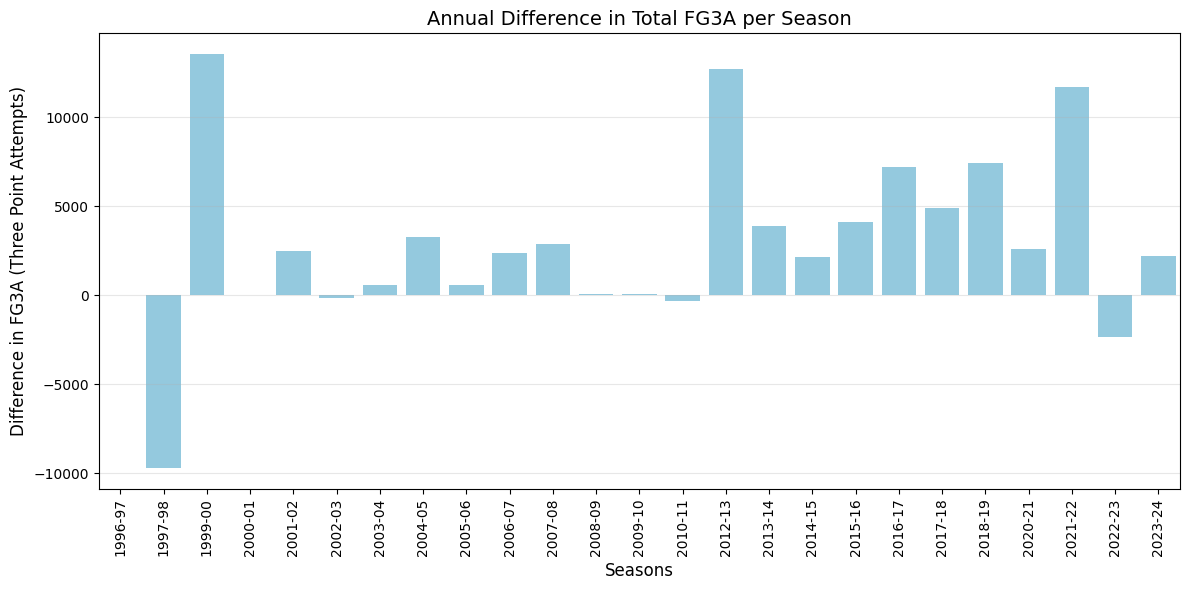

In [12]:
# Bar plot for FG3_DIFF
plt.figure(figsize = (12, 6))
sns.barplot(data = aggregate_season_stats, x = 'SEASON', y = 'FG3_DIFF', color = 'skyblue')

# Add labels and title
plt.xlabel('Seasons', fontsize = 12)
plt.ylabel('Difference in FG3A (Three Point Attempts)', fontsize = 12)
plt.title('Annual Difference in Total FG3A per Season', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 10)
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

### Summary + Descriptive Statistics (Visualization #3)

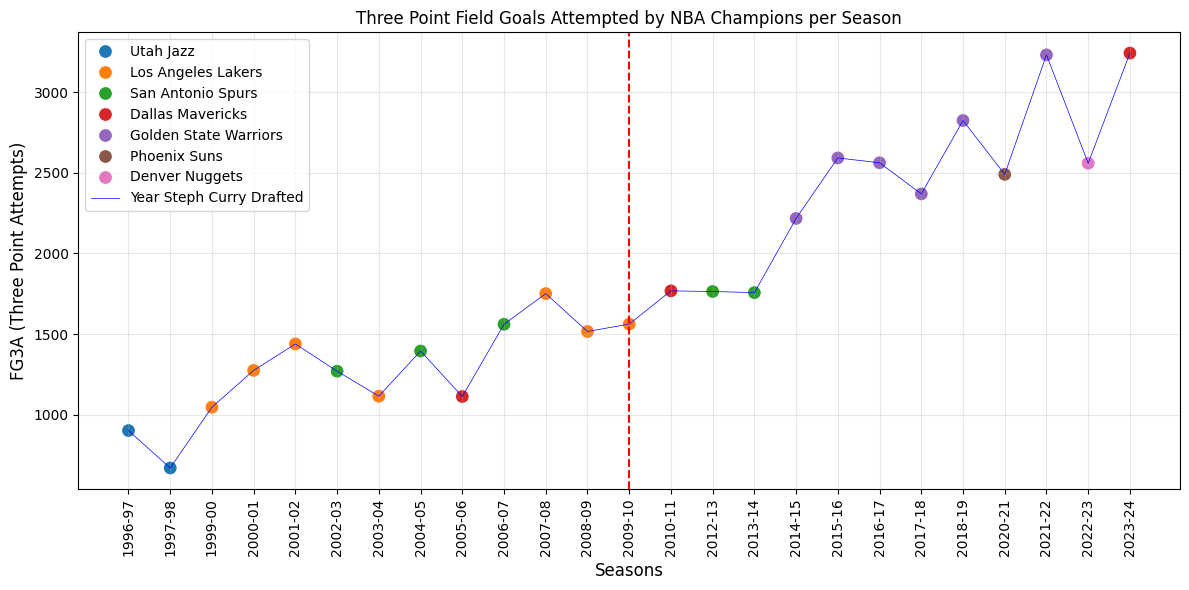

In [13]:
champs_only = merged_data[merged_data['TEAM_NAME'] == merged_data['Champion']]
champs_only = champs_only[~champs_only['SEASON'].isin(['1998-99', '2011-12', '2019-20'])]
plt.figure(figsize = (12,6))
sns.scatterplot(data = champs_only, x = 'SEASON', y = 'FG3A', hue = 'Champion', s = 100)
sns.lineplot(data = champs_only, x = 'SEASON', y = 'FG3A', color = 'blue', linewidth = 0.5, label = 'Year Steph Curry Drafted')

plt.axvline(x='2009-10', color='red', linestyle='--', linewidth=1.5, label='Steph Curry Drafted')

# Add labels and title
plt.xlabel('Seasons', fontsize = 12)
plt.ylabel('FG3A (Three Point Attempts)', fontsize = 12)
plt.title('Three Point Field Goals Attempted by NBA Champions per Season')
plt.xticks(rotation = 90, fontsize = 10)
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

### Main Analysis (Table #1)

In [14]:
mean_season_stats = all_stats.groupby('SEASON').agg(
    mean_FG3M=('FG3M', 'mean'),  # Calculate mean of FG3M
    mean_FG3A=('FG3A', 'mean')   # Calculate mean of FG3A
).assign(
    FG3_DIFF=lambda x: x['mean_FG3A'].diff().fillna(0)  # Calculate difference between seasons for mean FG3A
).reset_index()

mean_season_stats = mean_season_stats[~mean_season_stats['SEASON'].isin(['1998-99', '2011-12', '2019-20'])]
mean_season_stats.tail(10)

/var/folders/9c/rjnrtdkd64x4y964_06pt9dc0000gr/T/ipykernel_10630/4175311521.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  FG3_DIFF=lambda x: x['mean_FG3A'].diff().fillna(0)  # Calculate difference between seasons for mean FG3A


,SEASON,mean_FG3M,mean_FG3A,FG3_DIFF
17,2013-14,635.133333,1765.8,130.233333
18,2014-15,643.333333,1837.9,72.100000
19,2015-16,698.433333,1974.7,136.800000
20,2016-17,791.6,2214.033333,239.333333
21,2017-18,860.233333,2377.966667,163.933333
22,2018-19,931.833333,2624.733333,246.766667
24,2020-21,914.233333,2494.066667,85.666667
25,2021-22,1019.933333,2884.5,390.433333
26,2022-23,1011.966667,2805.466667,-79.033333
27,2023-24,1052.633333,2878.5,73.033333


### Main Analysis (Visualization #2)

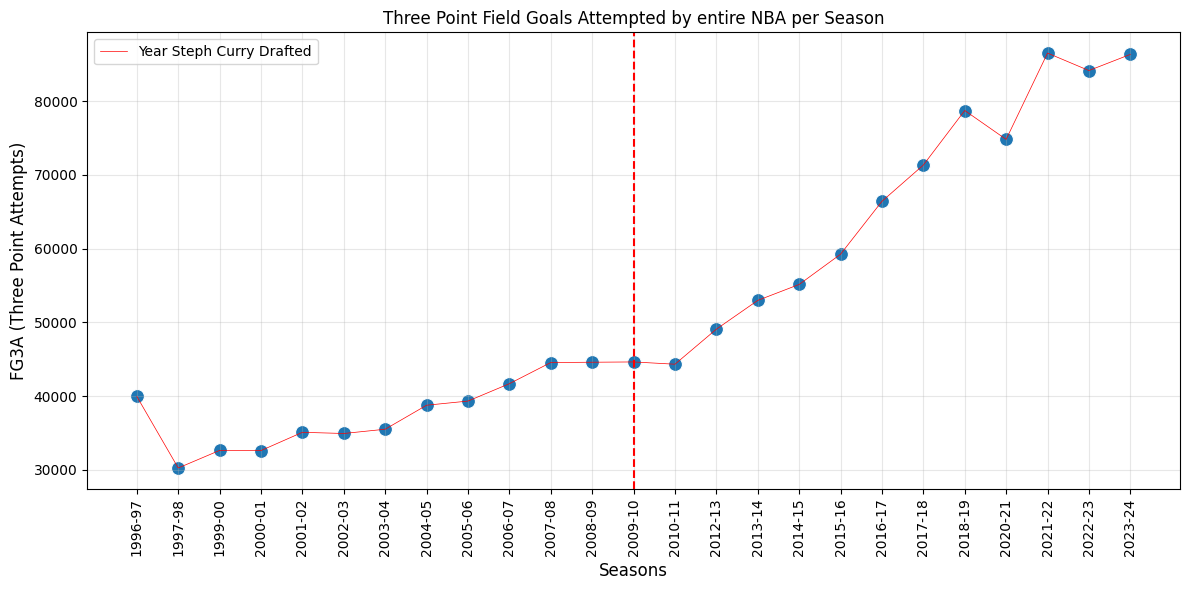

In [15]:
lockout_excluded = aggregate_season_stats[~aggregate_season_stats['SEASON'].isin(['1998-99', '2011-12', '2019-20'])]

plt.figure(figsize = (12,6))
sns.scatterplot(data = lockout_excluded, x = 'SEASON', y = 'total_FG3A', s = 100)
sns.lineplot(data = lockout_excluded, x = 'SEASON', y = 'total_FG3A', color = 'red', linewidth = 0.5, label = 'Year Steph Curry Drafted')

plt.axvline(x='2009-10', color='red', linestyle='--', linewidth=1.5, label='Steph Curry Drafted')

# Add labels and title
plt.xlabel('Seasons', fontsize = 12)
plt.ylabel('FG3A (Three Point Attempts)', fontsize = 12)
plt.title('Three Point Field Goals Attempted by entire NBA per Season')
plt.xticks(rotation = 90, fontsize = 10)
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

##### Looking at the visualizations and statistics, Steph's impact on the game begins to become quantifiably visible.
    From the seasons 1996-2009, on average, NBA teams attempted a total mean of 37,477 three pointers per season. After Steph Curry was drafted in 2009 (excluding the NBA lockout during the 2011-12 season), the league SKYROCKETED in total threes attempted per season, up to an average of 65,671.

Before 2009, the maximum number of three pointers ever taken in an NBA season was 44,583. Now the maximum is reaching nearly double that number, at 86,355 three pointers attempted in the 2023-24 season.


This visualization highlights not only Curry's direct impact but also his broader influence on the league's offensive evolution:
This wasn't just a temporary trend, but a fundamental and significant shift in the ideaology and styles in which the game is played. Curry's ability to shoot spaced the floor out so much that every position started to find themselves needing to be able to shoot threes. That's why when you watch today's NBA, you rarely see traditional big men like back in the old days (Shaq, Hakeem, Kareem), almost all of the big men today are quick, agile, and stretch the floors to shoot threes. Pairing this with the rise in sports analytics and technology, the three point attempts will just continue to rise...

Given more time, I would include more data sources and not also begin to look into specific seasons. Right now, the analysis is focusing on NBA seasons as a whole, but I believe there is a plethora of valuable information that can be gained when analyzing each individual season. 
Some topics that interested me that I didn't do for this project:
- Shot heat map: which parts of the floor are people shooting the most from (pre and post Steph Curry)
- Average shot distance (pre and post Steph Curry)

Lastly, establishing causality and statistical significance is extremely challenging, but tackling that beast would increase the validity in a future analysis and shift it from just being exploratory to maybe something more...